## Matrice de termes

On voit dans ce notebook comment créer une matrice de termes à partir de notre corpus de termes, de manière à pouvoir faire tourner les modèles que l'on connaît par ailleurs sur des variables numériques.  

On charge les données nettoyées.

In [1]:
import pickle
import pandas as pd

cr_df_clean = pd.read_pickle('cr_df_clean.pkl')

On va créer la matrice de termes, en indiquant au logiciel d'enlever les mots-balise comme "le", "et",... Ces mots n'apportent en effet pas grand chose à l'analyse en général. problème : la fonction propose automatiquement d'enlever les mots balise anglais mais pas les français. On va donc récupérer une liste dans un module python : 

In [2]:
from stop_words import get_stop_words
french_stop_words = get_stop_words('french')
french_stop_words

['a',
 'ai',
 'aie',
 'aient',
 'aies',
 'ait',
 'alors',
 'as',
 'au',
 'aucun',
 'aura',
 'aurai',
 'auraient',
 'aurais',
 'aurait',
 'auras',
 'aurez',
 'auriez',
 'aurions',
 'aurons',
 'auront',
 'aussi',
 'autre',
 'aux',
 'avaient',
 'avais',
 'avait',
 'avant',
 'avec',
 'avez',
 'aviez',
 'avions',
 'avoir',
 'avons',
 'ayant',
 'ayez',
 'ayons',
 'bon',
 'car',
 'ce',
 'ceci',
 'cela',
 'ces',
 'cet',
 'cette',
 'ceux',
 'chaque',
 'ci',
 'comme',
 'comment',
 'd',
 'dans',
 'de',
 'dedans',
 'dehors',
 'depuis',
 'des',
 'deux',
 'devoir',
 'devrait',
 'devrez',
 'devriez',
 'devrions',
 'devrons',
 'devront',
 'dois',
 'doit',
 'donc',
 'dos',
 'droite',
 'du',
 'dès',
 'début',
 'dù',
 'elle',
 'elles',
 'en',
 'encore',
 'es',
 'est',
 'et',
 'eu',
 'eue',
 'eues',
 'eurent',
 'eus',
 'eusse',
 'eussent',
 'eusses',
 'eussiez',
 'eussions',
 'eut',
 'eux',
 'eûmes',
 'eût',
 'eûtes',
 'faire',
 'fais',
 'faisez',
 'fait',
 'faites',
 'fois',
 'font',
 'force',
 'furent',

On peut maintenant utiliser `CountVectorizer` pour faire notre matrice de termes avec nos mots balise français : 

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = french_stop_words)

# On fit_transform 
cr_cv = cv.fit_transform(cr_df_clean.texte)
cr_dtm = pd.DataFrame(cr_cv.toarray(), columns = cv.get_feature_names())
cr_dtm.index = cr_df_clean.index
cr_dtm

,abattait,accentué,acclamé,accordé,acte,adversaire,alex,allemand,aller,américain,...,voir,wiegman,zagallo,échoué,écrit,égalisé,énergie,équipe,états,éternité
CR hommes,1,1,0,1,1,2,0,1,1,0,...,0,0,1,1,1,1,1,3,0,1
CR femmes,0,0,1,1,0,0,4,0,0,1,...,1,1,0,0,0,0,0,0,1,0


On peut maintenant regarder quels sont les mots les plus utilisés pour chacun des compte-rendus : c'est aussi l'occasion de vérifier que notre nettoyage a bien été réalisé ou s'il nécessite quelques retouches.

In [4]:
# on transpose le df pour trier par mots les plus utilisés
dtm_analyse = cr_dtm.transpose()
dtm_analyse.head(20)

,CR hommes,CR femmes
abattait,1,0
accentué,1,0
acclamé,0,1
accordé,1,1
acte,1,0
adversaire,2,0
alex,0,4
allemand,1,0
aller,1,0
américain,0,1


In [18]:
# pour les femmes
dtm_analyse["CR femmes"].sort_values(ascending = False).head(20)

morgan         6
van            6
américaines    4
alex           4
rapinoe        4
pu             3
stéphanie      3
frappart       3
match          3
megan          3
but            3
gauche         3
veenendaal     3
compétition    3
gardienne      3
face           3
coup           3
plus           3
centres        3
penalty        3
Name: CR femmes, dtype: int64

Avec la librairie `wordcloud`, on peut faire une représentation graphique intéressante de ces résultats : 

__Exercice :__  
- Utilisez la fonction `WordCloud` pour faire un nuage de mots pour le compte-rendu de match femmes et un autre pour celui des hommes. Voyez-vous d'autres nettoyages de mots à faire?
- 
- 
- 
- 
- 
- 
- 
- 
-   
__On corrige ensemble :__

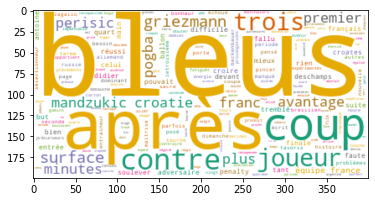

In [38]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=french_stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

wc.generate(cr_df_clean.texte["CR hommes"])

plt.imshow(wc, interpolation="bilinear")

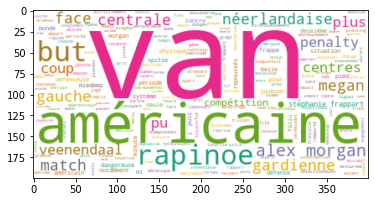

In [39]:
wc.generate(cr_df_clean.texte["CR femmes"])

plt.imshow(wc, interpolation="bilinear")